# 1. Checking Images and the Photometric Catalog

In this tutorial, we will analyze real JWST NIRCam images. The images that we will analyze are the JWST ERO (Early Release Observations) data of SMACS 0723 (i.e., the first JWST images) that were released to the world on July 13, 2022. The NIRCam images consist of six filters: F090W, F150W, F200W, F277W, F356W, and F444W. In addition to this, we will also analyze Hubble Space Telescope (HST) images of the same field. 

Now, suppose that we already have catalogs of photometric SEDs (spectral energy distributions) and redshifts (i.e., the processes of sources detection and aperture photometry have been carried out) and now we will be selecting some interesting galaxies and do some basic analysis on them, such as making stamp image cutouts, plot the integrated SED, and some simple morphological analysis.  

These data sets are kindly provided by Gabriel Brammer on this link https://s3.amazonaws.com/grizli-v2/SMACS0723/Test/image_index.html and https://zenodo.org/record/6874301#.YvZFYOxBy3I. The data sets were processed using the [grizli](https://github.com/gbrammer/grizli) package. 

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1.1. Checking JWST images

The NIRCam images consist of six filters: F090W, F150W, F200W, F277W, F356W, and F444W. These processed data 

In [2]:
filters_jwst = ['jwst_nircam_f090w', 'jwst_nircam_f150w', 'jwst_nircam_f200w', 
                'jwst_nircam_f277w', 'jwst_nircam_f356w', 'jwst_nircam_f444w']
nbands_jwst = len(filters_jwst)

jwst_img = []
jwst_img.append("smacs0723-f090w_drz_sci.fits")
jwst_img.append("smacs0723-f150w_drz_sci.fits")
jwst_img.append("smacs0723-f200w_drz_sci.fits")
jwst_img.append("smacs0723-f277w_drz_sci.fits")
jwst_img.append("smacs0723-f356w_drz_sci.fits")
jwst_img.append("smacs0723-f444w_drz_sci.fits")

data_dir = 'data/'

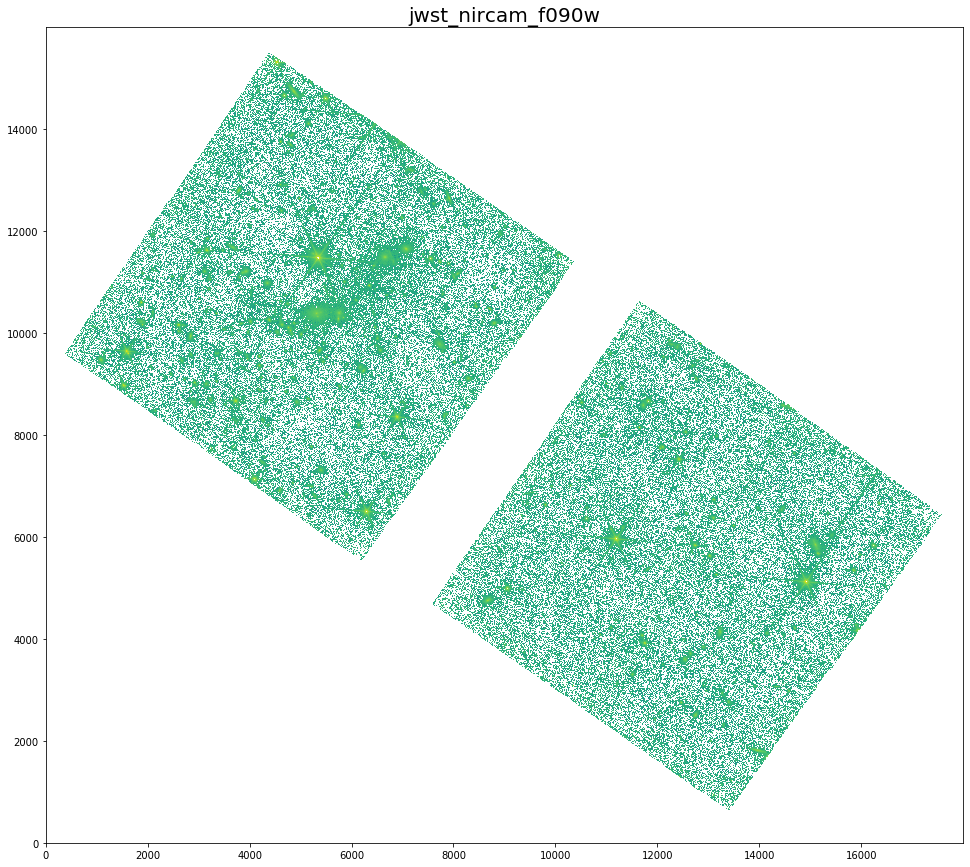

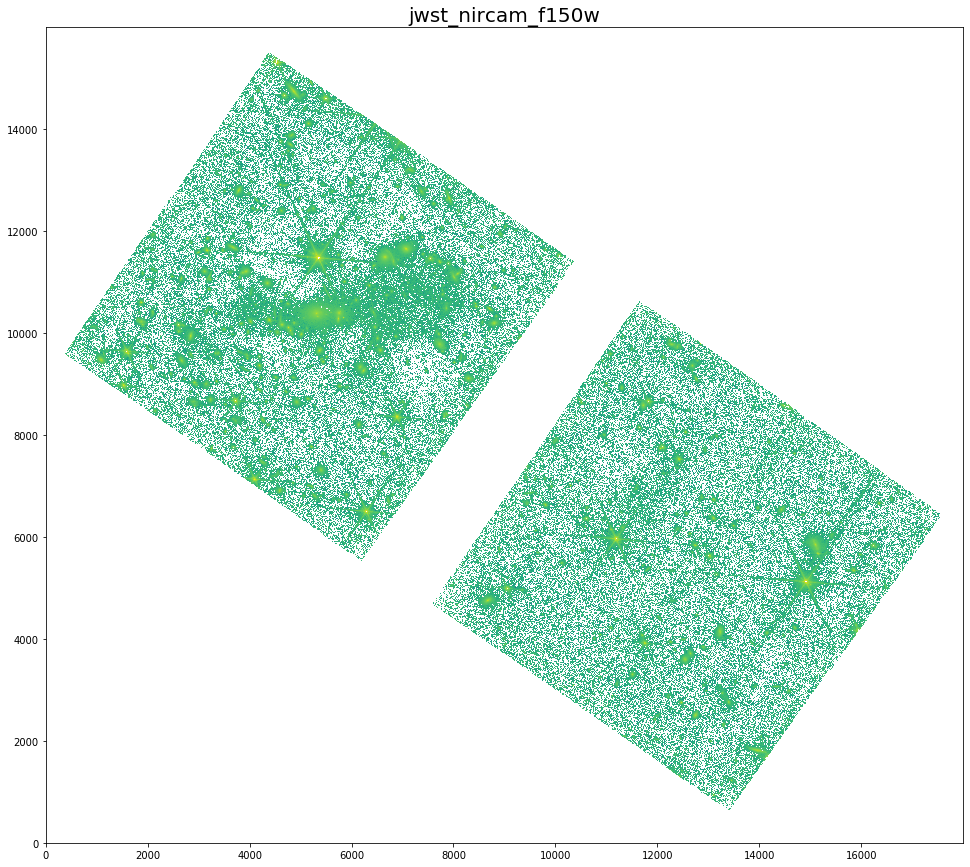

In [5]:
for i in range(0,2):
    hdu = fits.open(data_dir+jwst_img[i])
    data_img = hdu[0].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(18,15))
    f1 = plt.subplot()
    plt.title('%s' % filters_jwst[i], fontsize=20)
    plt.imshow(np.log10(data_img), origin='lower')

## 1.2. Check HST images

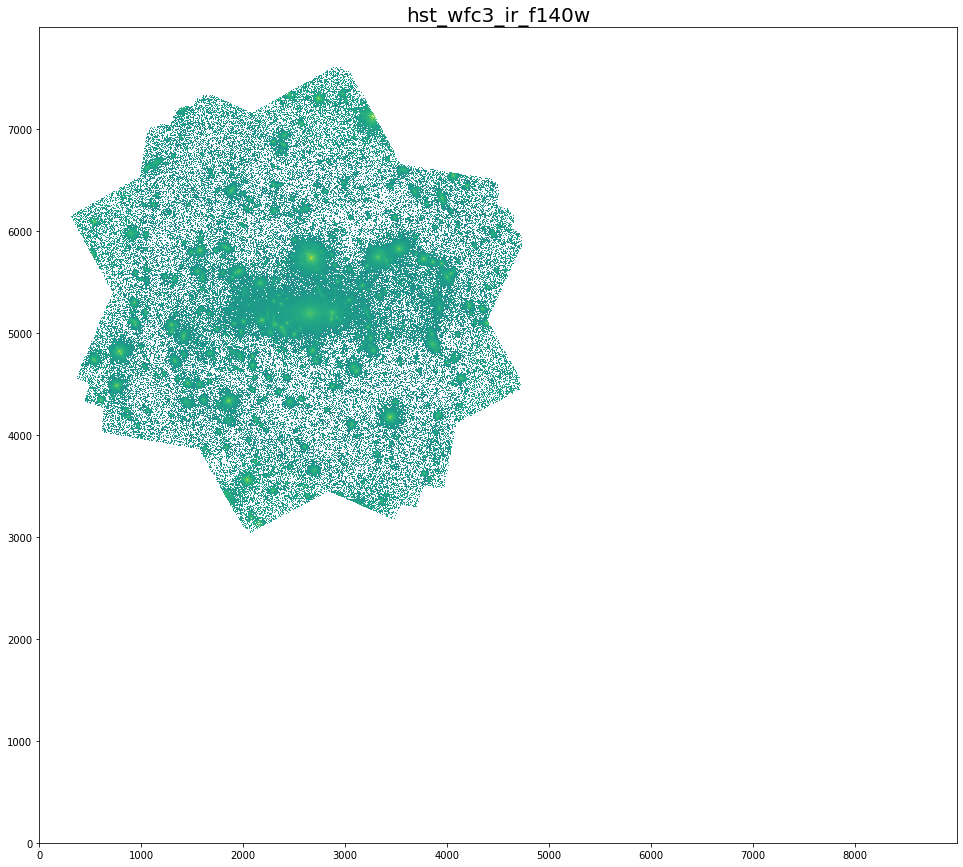

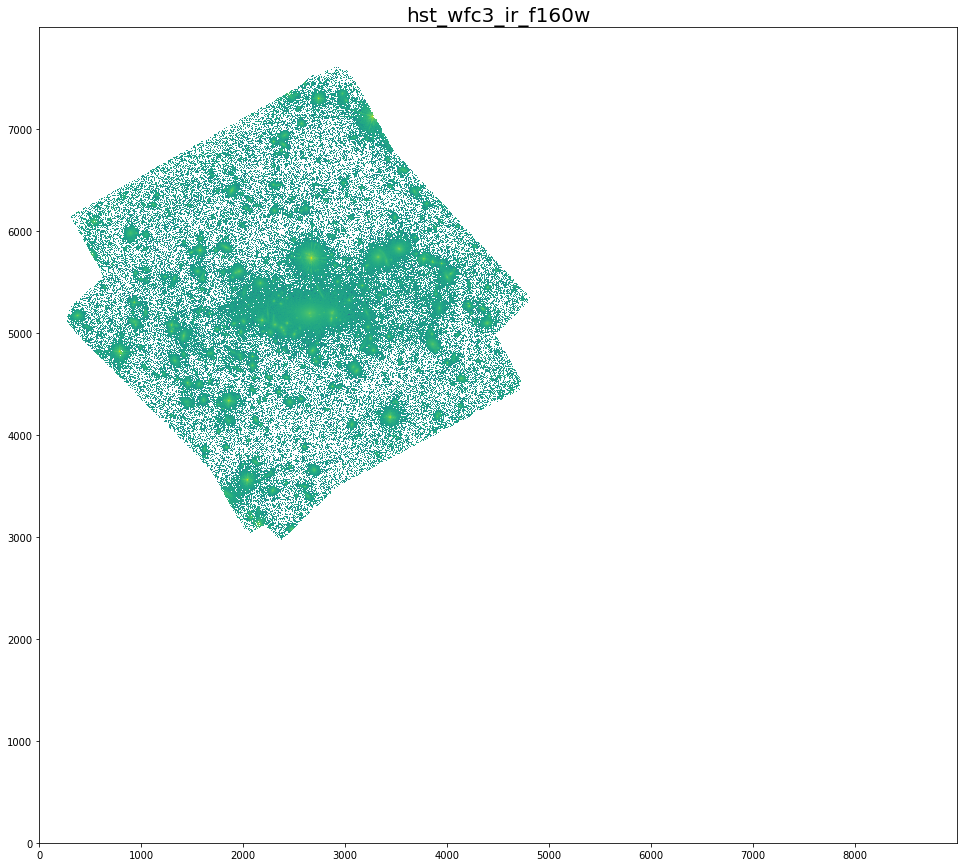

In [8]:
filters_hst = ['hst_acs_f435w', 'hst_acs_f606w', 'hst_acs_f814w', 'hst_wfc3_ir_f105w', 
               'hst_wfc3_ir_f125w', 'hst_wfc3_ir_f140w', 'hst_wfc3_ir_f160w']
nbands_hst = len(filters_hst)

hst_img = []
hst_img.append("smacs0723-f435w_drc_sci.fits")
hst_img.append("smacs0723-f606w_drc_sci.fits")
hst_img.append("smacs0723-f814w_drc_sci.fits")
hst_img.append("smacs0723-f105w_drz_sci.fits")
hst_img.append("smacs0723-f125w_drz_sci.fits")
hst_img.append("smacs0723-f140w_drz_sci.fits")
hst_img.append("smacs0723-f160w_drz_sci.fits")

for i in range(5,7):
    hdu = fits.open(data_dir+hst_img[i])
    data_img = hdu[0].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(18,15))
    f1 = plt.subplot()
    plt.title('%s' % filters_hst[i], fontsize=20)
    plt.imshow(np.log10(data_img), origin='lower')

## 1.3. Check photometric redshift catalogs

In [11]:
# get photometric redshift catalogs
hdu = fits.open(data_dir+"smacs0723.eazypy.zout.fits")
hdu.info()
pz_cat = hdu[1].data
print (hdu[1].header)
hdu.close()

Filename: data/smacs0723.eazypy.zout.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    266   7585R x 45C   [J, D, D, D, K, E, E, E, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, D, D, D, D, D, D, D, 5D, 5D, 5D, 5D, 5D, 5D]   
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  456 / length of dimension 1                          NAXIS2  =                 7585 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   45 / number of table fields                         TTYP

In [12]:
# get some important information from the catalog
z_phot = pz_cat['z_phot']
z_phot_chi2 = pz_cat['z_phot_chi2']
log_mass = np.log10(pz_cat['mass'])
log_sfr = np.log10(pz_cat['sfr'])

## 1.4. Check photometric catalog

In [15]:
hdu = fits.open(data_dir+'smacs0723_phot_apcorr.fits')
hdu.info()
photo_cat = hdu[1].data
print (hdu[1].header)

Filename: data/smacs0723_phot_apcorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU   2906   7585R x 786C   [J, D, K, K, K, K, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, K, K, D, D, J, D, D, D, D, D, D, K, D, D, D, D, D, D, K, D, I, D, D, D, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D, D, D, D, I, D